# Introduction  

This notebook generates some figures that I generated for the 2022 Western-Fields School in Networks and Neuroscience. The full program is here 

https://uwo.ca/academy/themes/neural_networks/2022_western_fields_school.html

I use the Python package Networkx to generate these figures. You can see the documentation of this package here 

https://networkx.org/


This is the second part of the code. In this notebook, I will explain further functionality of Networkx, including but not limited to: adjacency matrices, spectral properties. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from numpy import savetxt
from numpy.linalg import eig


There are many built in functions in Networkx that we can use. For example, we can produce a complete graph on $n$ nodes.

In [2]:
n=5
G = nx.complete_graph(n)

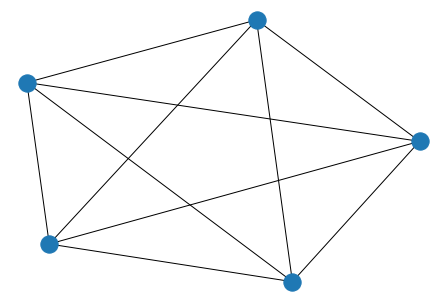

In [3]:
nx.draw(G)

Here are some functions that I wrote to produce the graphs that I introduced in the lecture.

In [4]:
def complete_graph(n):
    g=nx.empty_graph()
    for i in range(0,n):
        for j in range(0, n):
            if i !=j: 
                g.add_edge(i,j)
    return g      

def cycle_graph(n):
    g=nx.Graph()
    for i in range(0,n-1):
        g.add_edge(i, i+1)
    g.add_edge(n-1, 0)    
    return g    

def paley(q):
    squares = set([(a**2)%q for a in range(1,q)])
    g=nx.empty_graph(q)
    for i in range(0,q):
        for j in range(0,q):
            if (i-j)%q in squares:
                g.add_edge(i,j)
    return g  

def ring_graph(N,k):
    g = nx.empty_graph(N)
    for i in range(0,N):
        for j in range(0,N):
            if (i-j)% N !=0 and (i-j)%N <=k:
                g.add_edge(i,j)
    return g            
                

# The adjacency matrix of a graph 

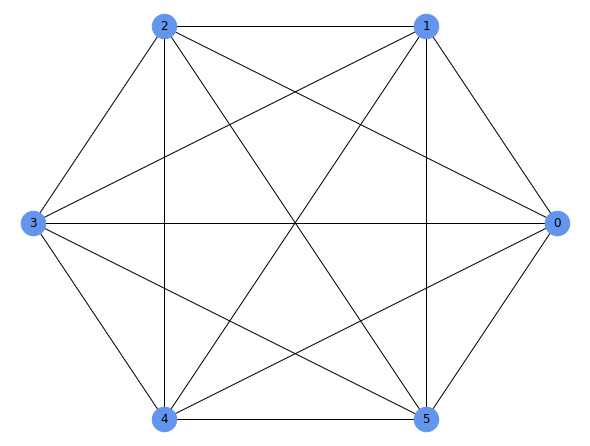

In [47]:
#complete graph on 6 nodes 
fig = plt.gcf()
fig.set_size_inches(8,6)
g1 = complete_graph(6)
nx.draw_circular(g1, with_labels = True,
                node_size = 600,
                node_color = '#6495ED')


To get the adjacency matrix of this graph, we can use the following line of code

In [49]:
A1 = nx.adjacency_matrix(g1)
print(A1.todense()) #todense converse a spare matrix to a dense one

[[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]


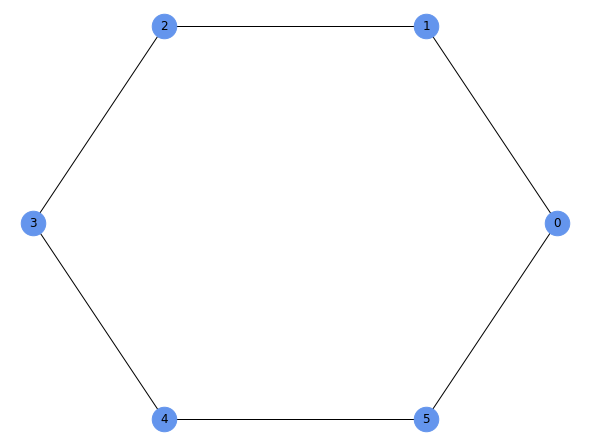

In [50]:
#the cycle graph on N=6 nodes
fig = plt.gcf()
fig.set_size_inches(8,6)
g2 = cycle_graph(6)
nx.draw_circular(g2, with_labels = True,
                node_size = 600,
                 scale = 2,
                node_color = '#6495ED')


In [51]:
#The adjacency matrix of the cycle graph C_6
A2 = nx.nx.adjacency_matrix(g2)
print(A2.todense())

[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]


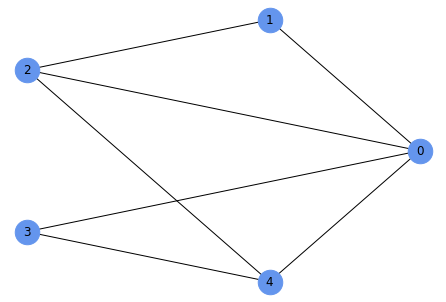

In [27]:
#a random graph with 5 nodes 
g3 = nx.erdos_renyi_graph(n=5, p = 0.5)
nx.draw_circular(g3, with_labels = True,
                node_size = 600,
                 scale = 2,
                node_color = '#6495ED')
plt.savefig("random_graph.png", dpi =300)

In [29]:
A3 = nx.nx.adjacency_matrix(g3)
print(A3.todense())

[[0 1 1 1 1]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [1 0 1 1 0]]


To save the adjacency matrix of this random graphh, we can use the following line of code. 

In [43]:
A =  A3.todense()
savetxt('random_graph.csv', A, delimiter=',')


In [46]:
savetxt(fname='random_graph.txt',X=A , fmt ='%.0f\n')

# Spectra of a graph

In this section, we explain how to obtain the spectrum of a graph numerically/analytically. Recall that if the adjacency matrix of $G$ is $A$ then the spectrum of $G$ is defined to be the set of eigenvalues of $A$. More precisely, they are the roots of the characteristic polynomial 

$$p_{A}(t) = \det(tI_n - A)$$

Let us start with the complete graph $K_n$ for some small $n$.

In [52]:
#the complete graph K_3 
n=3
g1 = complete_graph(n)
spectrum1 = nx.adjacency_spectrum(g1)
print(spectrum1)

[-1.+0.j  2.+0.j -1.+0.j]


In [53]:
#the complete graph K_4 
n=4
g1 = complete_graph(n)
spectrum1 = nx.adjacency_spectrum(g1)
print(spectrum1)

[-1.+0.j  3.+0.j -1.+0.j -1.+0.j]


In [54]:
#the complete graph K_5
n=5
g1 = complete_graph(n)
spectrum1 = nx.adjacency_spectrum(g1)
print(spectrum1)

[-1.+0.j  4.+0.j -1.+0.j -1.+0.j -1.+0.j]


It looks like the spectrum of $K_n$ follow a quite nice patterns. Namely, we observe that $-1$ is an eigenvalue with multiplicity $n-1$ and $(n-1)$ is an eigenvalue with multiplicity $1$. It is therefore natural to expect that. 

Prop: The eigenspectrum of $K_n$ is $\{[-1]_{n-1}, [n-1]_{1} \}$ where $[a]_b$ denotes the multiset where $a$ appears $b$ times. 

Next, we study the spectrum of the ring graph $R(N,k)$

In [55]:
#The ring graph N=7, k= 2 
N=7
k=2 
g2 = ring_graph(N,k)
spectrum2 = nx.adjacency_spectrum(g2)
print(spectrum2)

[ 4.        +0.j -0.55495813+0.j  0.80193774+0.j -2.2469796 +0.j
 -2.2469796 +0.j  0.80193774+0.j -0.55495813+0.j]


Alternative, we can also use the built-in packeage linear algebra in numpy.

In [62]:
g2 = ring_graph(N,k)
A2 = nx.adj_matrix(g2)
w,v=eig(A2.todense()) #eigenvalues and eigenvector of A2
print(sorted(w, reverse= True))


[4.000000000000001, 0.8019377358048385, 0.8019377358048383, -0.5549581320873709, -0.5549581320873718, -2.2469796037174663, -2.2469796037174663]


In [5]:
#The ring graph N=7, k= 2 
N=12
k=1
g2 = ring_graph(N,k)
spectrum2 = nx.adjacency_spectrum(g2)
print(spectrum2)

[-2.00000000e+00+0.j -1.00000000e+00+0.j  2.00000000e+00+0.j
 -1.73205081e+00+0.j -1.73205081e+00+0.j -1.00000000e+00+0.j
 -5.59523095e-17+0.j -2.11606507e-16+0.j  1.73205081e+00+0.j
  1.73205081e+00+0.j  1.00000000e+00+0.j  1.00000000e+00+0.j]
